# Predict the probability of an candidate looking for a new job

## 1.Problem definition
Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

## 2.Data
- The original data can be found [Here](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)
- The original dataset has been pre-processed in R.

## 3.Original features

* enrollee_id : Unique ID for candidate

* city: City code

* city_ development _index : Developement index of the city (scaled)

* gender: Gender of candidate

* relevent_experience: Relevant experience of candidate

* enrolled_university: Type of University course enrolled if any

* education_level: Education level of candidate

* major_discipline :Education major discipline of candidate

* experience: Candidate total experience in years

* company_size: No of employees in current employer's company

* company_type : Type of current employer

* lastnewjob: Difference in years between previous job and current job

* training_hours: training hours completed

* target: 0 – Not looking for job change, 1 – Looking for a job change

## 4.Get the data ready

In [2]:
#Let´s import the necessary libraries for a quickly visualization
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#This is the pre-processed data in R
original = pd.read_csv("./Data/aug_train_nomissing_nooutliers.csv")
original.shape

(18198, 11)

As we can see, the dataset just have 11 features, no the 14. Because the data has been pre-processed. And for have a strong information we decided drop the features company_size, company_type and gender, because those features were imputed plenty of missing values.

The data loosk like:

In [12]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18198 entries, 0 to 18197
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18198 non-null  int64  
 1   city                    18198 non-null  object 
 2   city_development_index  18198 non-null  float64
 3   relevent_experience     18198 non-null  object 
 4   enrolled_university     18198 non-null  object 
 5   education_level         18198 non-null  object 
 6   major_discipline        18198 non-null  object 
 7   experience              18198 non-null  object 
 8   last_new_job            18198 non-null  object 
 9   training_hours          18198 non-null  int64  
 10  target                  18198 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 1.5+ MB


In [13]:
original.head()

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
0,8949,city_103,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,1,36,1
1,29725,city_40,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,>4,47,0
2,11561,city_21,0.624,No relevent experience,Full time course,Graduate,STEM,5,never,83,0
3,33241,city_115,0.789,No relevent experience,Full time course,Graduate,Business Degree,<1,never,52,1
4,666,city_162,0.767,Has relevent experience,no_enrollment,Masters,STEM,>20,4,8,0


In [14]:
original.tail()

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
18193,29754,city_103,0.920,Has relevent experience,no_enrollment,Graduate,Humanities,7,1,25,0
18194,31398,city_103,0.920,Has relevent experience,no_enrollment,Graduate,STEM,14,4,52,1
18195,24576,city_103,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,4,44,0
18196,5756,city_65,0.802,Has relevent experience,no_enrollment,High School,Business Degree,<1,2,97,0
18197,23834,city_67,0.855,No relevent experience,no_enrollment,Primary School,Business Degree,2,1,127,0


**Missing values**

In [17]:
original.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
last_new_job              0
training_hours            0
target                    0
dtype: int64

No missing values

**Transform data**

In [21]:
for label, content in original.items():
    if pd.api.types.is_string_dtype(content):
        original[label] = content.astype("category").cat.as_ordered()
        original[label] = pd.Categorical(content).codes

In [24]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18198 entries, 0 to 18197
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18198 non-null  int64  
 1   city                    18198 non-null  int8   
 2   city_development_index  18198 non-null  float64
 3   relevent_experience     18198 non-null  int8   
 4   enrolled_university     18198 non-null  int8   
 5   education_level         18198 non-null  int8   
 6   major_discipline        18198 non-null  int8   
 7   experience              18198 non-null  int8   
 8   last_new_job            18198 non-null  int8   
 9   training_hours          18198 non-null  int64  
 10  target                  18198 non-null  int64  
dtypes: float64(1), int64(3), int8(7)
memory usage: 693.2 KB


**Overview**

In [35]:
original.describe()

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
count,18198.000000,18198.000000,18198.000000,18198.000000,18198.000000,18198.000000,18198.000000,18198.000000,18198.000000,18198.000000,18198.000000
mean,16813.640675,37.359215,0.833557,0.272942,1.540774,0.696230,4.106495,12.965381,1.796131,65.451094,0.222222
std,9612.736342,30.241572,0.121582,0.445484,0.804151,0.996029,1.687643,6.616544,1.935624,60.066482,0.415751
min,1.000000,0.000000,0.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8481.250000,5.000000,0.754000,0.000000,1.000000,0.000000,5.000000,7.000000,0.000000,23.000000,0.000000
50%,16898.500000,42.000000,0.910000,0.000000,2.000000,0.000000,5.000000,14.000000,1.000000,47.000000,0.000000
75%,25113.250000,55.000000,0.920000,1.000000,2.000000,2.000000,5.000000,19.000000,4.000000,89.000000,0.000000
max,33380.000000,107.000000,0.949000,1.000000,2.000000,4.000000,5.000000,21.000000,5.000000,336.000000,1.000000


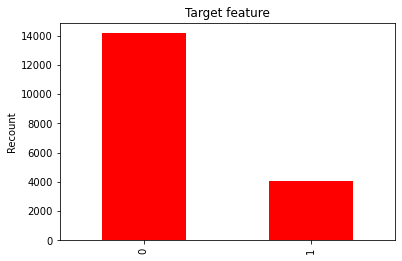

In [32]:
fig , ax = plt.subplots()
original["target"].value_counts().plot(kind='bar', ax=ax, cmap='flag')
ax.set(title='Target feature', ylabel='Recount');

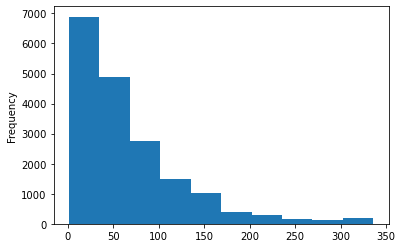

In [33]:
original.training_hours.plot.hist();

**Split data**

In [37]:
x = original.drop('target', axis=1)
y = original.target

In [39]:
x.shape, y.shape

((18198, 10), (18198,))

Now into training and validation set of data

In [40]:
from sklearn.model_selection import train_test_split

In [49]:
np.random.seed(85)
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((14558, 10), (3640, 10), (14558,), (3640,))

## 5.Pick a model

We will be looking at following Algorithms

* RandomForestClassifier
* ExtraTreesClassifier
* GradientBoostingClassifier
* LogisticRegression
* SVC
* KNeighborsClassifier

In [42]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [43]:
models = [
    ['RandomForestClassifier: ', RandomForestClassifier()],
    ['ExtraTreesClassifier: ', ExtraTreesClassifier()],
    ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
    ['LogisticRegression: ', LogisticRegression()],
    ['SVC: ', SVC()],
    ['KNeighborsClassifier: ', KNeighborsClassifier()]
]

## 6.Fit and evaluate each model

In [46]:
# Run all the proposed models and update the information in a list model_data
import time
from sklearn.metrics import accuracy_score

In [51]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 85
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(x_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Accuracy_score"] = accuracy_score(y_val,curr_model.predict(x_val))
    model_data.append(curr_model_data)

C:\Users\Renzo Tello\desktop\machine_learning\hr_analytics\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
model_data

[{'Name': 'RandomForestClassifier: ',
  'Train_Time': 1.946793556213379,
  'Accuracy_score': 0.7953296703296703},
 {'Name': 'ExtraTreesClassifier: ',
  'Train_Time': 1.5338985919952393,
  'Accuracy_score': 0.7865384615384615},
 {'Name': 'GradientBoostingClassifier: ',
  'Train_Time': 1.7932446002960205,
  'Accuracy_score': 0.810989010989011},
 {'Name': 'LogisticRegression: ',
  'Train_Time': 2.255009412765503,
  'Accuracy_score': 0.7796703296703297},
 {'Name': 'SVC: ',
  'Train_Time': 3.592393159866333,
  'Accuracy_score': 0.7796703296703297},
 {'Name': 'KNeighborsClassifier: ',
  'Train_Time': 0.05285787582397461,
  'Accuracy_score': 0.7370879120879121}]

In [53]:
# Convert list to dataframe
df = pd.DataFrame(model_data)

In [54]:
df

,Name,Train_Time,Accuracy_score
0,RandomForestClassifier:,1.946794,0.795330
1,ExtraTreesClassifier:,1.533899,0.786538
2,GradientBoostingClassifier:,1.793245,0.810989
3,LogisticRegression:,2.255009,0.779670
4,SVC:,3.592393,0.779670
5,KNeighborsClassifier:,0.052858,0.737088


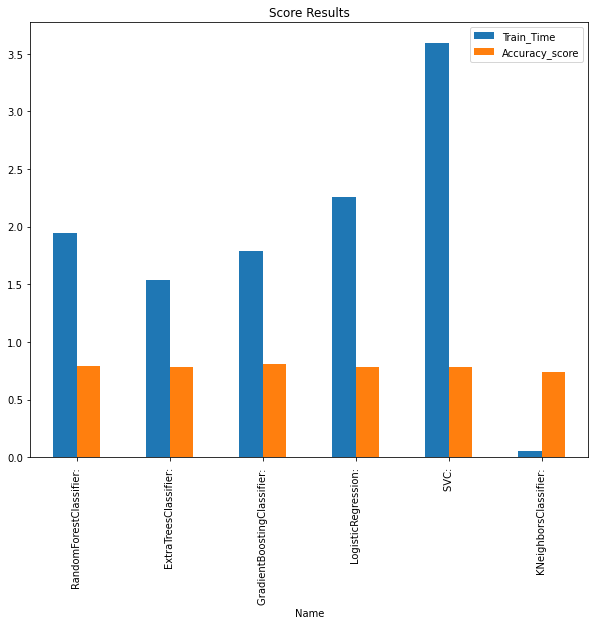

In [55]:
df.plot(x="Name", y=['Train_Time' , 'Accuracy_score'], kind="bar" , title = 'Score Results' , figsize= (10,8)) ;

1. Best result in accuracy for "GradientBoostingClassifier" | 81% ac
2. Best result in time for "KNeighborsClassifier"  | 73.7% ac

## 7.Improving some models

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
grid_gbc = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

In [58]:
clf_1 = GradientBoostingClassifier(random_state = 85)
# Instantiate the grid search model
grid_search_clf_1 = GridSearchCV(estimator = clf_1, param_grid = grid_gbc, cv = 5, n_jobs = -1, verbose=2)
grid_search_clf_1.fit(x_train, y_train)

Fitting 5 folds for each of 84672 candidates, totalling 423360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 626 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 1192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1922 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2812 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3866 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 5080 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 6458 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 7996 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 9698 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 11560 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 13586 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 15772 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 18122 tasks   

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=85),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'loss': ['deviance'], 'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                         'min_samples_split': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                         'n_estimators': [10],
                         'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0]},
             verbose=2)

In [59]:
grid_search_clf_1.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'deviance',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.28181818181818186,
 'n_estimators': 10,
 'subsample': 1.0}

In [60]:
grid_search_clf_1.best_estimator_

GradientBoostingClassifier(learning_rate=0.2, max_depth=8, max_features='log2',
                           min_samples_leaf=0.1,
                           min_samples_split=0.28181818181818186,
                           n_estimators=10, random_state=85)

In [61]:
grid_search_clf_1.best_estimator_.score(x_train, y_train)

0.7999038329440857

In [62]:
grid_search_clf_1.best_estimator_.score(x_val, y_val)

0.8041208791208792

In [66]:
model = GradientBoostingClassifier(learning_rate=0.2, max_depth=8, max_features='log2',
                           min_samples_leaf=0.1,
                           min_samples_split=0.28181818181818186,
                           n_estimators=10, random_state=85, criterion="friedman_mse", loss="deviance", subsample=1.0)
model.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=8, max_features='log2',
                           min_samples_leaf=0.1,
                           min_samples_split=0.28181818181818186,
                           n_estimators=10, random_state=85)

## 8.Evaluation

In [65]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_val, model.predict(x_val)))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      2838
           1       0.62      0.29      0.40       802

    accuracy                           0.80      3640
   macro avg       0.72      0.62      0.64      3640
weighted avg       0.78      0.80      0.78      3640



A slight disproportion can be seen in the target variable, with 0 being 80% of the data. 
Therefore, being able to predict that a value is (1) is really very unlikely for the model.
We could be more sure of when the model gives us a 0, than a 1.

## 9.Feature importance

In [69]:
# Get sorted list of features in order of importance
feature_indices = np.argsort(model.feature_importances_)

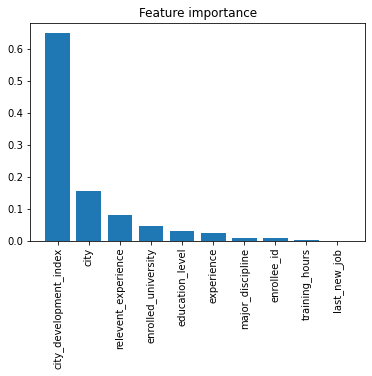

In [71]:
importance = model.feature_importances_
indices = np.argsort(importance)[::-1]
names = [x_train.columns[i] for i in indices]

#plotting
plt.title("Feature importance")
plt.bar(range(x_train.shape[1]), importance[indices])
plt.xticks(range(x_train.shape[1]), names, rotation=90);

In [72]:
# Get top 5 most important feature 
names[0:5]

['city_development_index',
 'city',
 'relevent_experience',
 'enrolled_university',
 'education_level']

In [74]:
# Reduce test & training set to 5 feature set
train_important_feature = x_train[names[0:5]]
val_important_feature = x_val[names[0:5]]

In [75]:
# Clone the model with his parameter and fit on reduced dataset

from sklearn.base import clone
cloned_model = clone(model)
cloned_model.fit(train_important_feature , y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=8, max_features='log2',
                           min_samples_leaf=0.1,
                           min_samples_split=0.28181818181818186,
                           n_estimators=10, random_state=85)

In [77]:
print(classification_report(y_val, cloned_model.predict(val_important_feature)))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2838
           1       0.60      0.33      0.42       802

    accuracy                           0.80      3640
   macro avg       0.71      0.63      0.65      3640
weighted avg       0.78      0.80      0.78      3640



**There is no reasonable improvement in the evaluation parameters**

In [80]:
from joblib import dump, load

In [81]:
dump(model, filename="./model/GradientBoostingClassifier.joblib")

['./model/GradientBoostingClassifier.joblib']

## Conclusions

1. At the beginning of the project, it could be seen that the database presented variables with a large amount of missing data.
2. The information was processed to be as consistent as possible
3. The most qualified model would be **"GradientBoostingClassifier"**
4. The probability of predicting that a candidate aren't looking for a new job is more accurate than predicting otherwise.
5. The city is a important feature to build a realiable model.